In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
carry = pd.read_csv('D:/Projects/Crim_viz/town_of_carry.csv', sep=';', 
                    dtype={'Beat_Number':str, 'Neighborhd_ID':str})

In [3]:
carry.sample(5)

,Crime_Category,Crime_Type,UCR,Map_Reference,Incident_Number,Date_From,newdate,From_Time,Date_To,To_Time,...,phxRecordStatus,PhxCommunity,PhxStatus,Record,OffenseCategory,ViolentProperty,timeframe,domestic,Total_Incidents,year
92186,LARCENY,LARCENY - FROM MOTOR VEHICLE,23F,P045,8005877,2008-11-02T13:30:00-05:00,2008-11-02,13:30:00,2008-11-02T14:35:00-05:00,14:35:00,...,NaN,No,NaN,75100,Larceny,Part I,Out of Range,N,1,2008.0
56296,LARCENY,LARCENY - ALL OTHER LARCENY,23H,P004,13005713,2013-06-10T08:00:00-04:00,2013-06-10,08:00:00,2013-07-08T13:45:00-04:00,13:45:00,...,NaN,No,NaN,59872,Larceny,Part I,Out of Range,N,1,2013.0
19905,ALL OTHER,EMBEZZLEMENT - PAPER,270,P061,9004198,2009-02-14T09:48:00-05:00,2009-02-14,09:48:00,2009-08-20T09:48:00-04:00,09:48:00,...,NaN,No,NaN,39824,Embezzlement,Part II,Out of Range,N,1,2009.0
29591,ALL OTHER,VANDALISM,290,P039,3003600,2003-07-17T23:00:00-04:00,2003-07-17,23:00:00,2003-07-18T08:00:00-04:00,08:00:00,...,NaN,Yes,Active,106539,Vandalism,Part II,Out of Range,N,1,2003.0
24703,ALL OTHER,VANDALISM,290,P071,7001760,2007-04-06T13:00:00-04:00,2007-04-06,13:00:00,2007-04-09T08:30:00-04:00,08:30:00,...,NaN,No,NaN,108495,Vandalism,Part II,Out of Range,N,1,2007.0


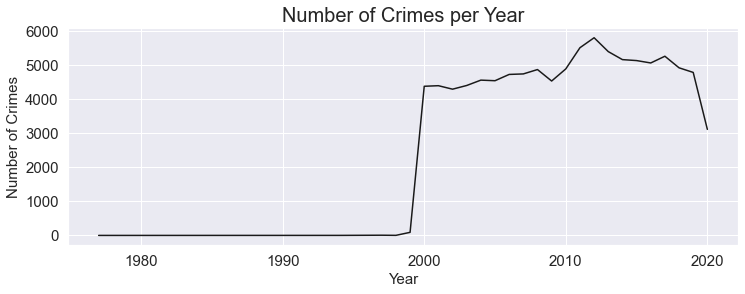

In [4]:
byyear = carry['year'].value_counts().sort_index()
byyear.plot(figsize=(12, 4), color='k', fontsize=15)

plt.title('Number of Crimes per Year', fontsize=20)
plt.ylabel('Number of Crimes', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()

In [5]:
carry = carry[carry['year'] >= 2000]

In [6]:
carry.columns

Index(['Crime_Category', 'Crime_Type', 'UCR', 'Map_Reference',
       'Incident_Number', 'Date_From', 'newdate', 'From_Time', 'Date_To',
       'To_Time', 'CrimeDay', 'GeoCode', 'Location_Category', 'District',
       'Beat_Number', 'Location', 'Id', 'Lat', 'Lon', 'Time_To', 'Time_From',
       'chrgcnt', 'Neighborhd_ID', 'Apartment_Complex',
       'Residential_Subdivision', 'Subdivisn_ID', 'activity_date',
       'phxRecordStatus', 'PhxCommunity', 'PhxStatus', 'Record',
       'OffenseCategory', 'ViolentProperty', 'timeframe', 'domestic',
       'Total_Incidents', 'year'],
      dtype='object')

In [7]:
# Aim for date and time together in single datetime

colselect = ['newdate', 'From_Time', 'Lat', 'Lon',\
            'OffenseCategory', 'ViolentProperty', 'domestic', \
            'Total_Incidents']

colnames = ['Date', 'Time', 'Lat', 'Lon', 'Cat', \
            'VP', 'Domestic', 'Tot_Inc']

df = carry[colselect]
df.columns = colnames

df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.head()

,Time,Lat,Lon,Cat,VP,Domestic,Tot_Inc
Date,,,,,,,
2004-02-14,08:00:00,35.756498,-78.812111,Fraud,Part II,N,1
2005-05-17,09:00:00,35.758153,-78.816455,Fraud,Part II,N,1
2007-01-12,15:04:00,35.761374,-78.820696,Fraud,Part II,N,1
2010-01-01,10:52:00,35.757876,-78.814737,Fraud,Part II,N,1
2001-10-16,08:00:00,35.740426,-78.779495,Fraud,Part II,N,1


In [8]:
df.shape

(100300, 7)

In [9]:
df.dtypes

Time         object
Lat         float64
Lon         float64
Cat          object
VP           object
Domestic     object
Tot_Inc       int64
dtype: object

In [10]:
df.isna().sum()

Time           0
Lat         5973
Lon         5973
Cat         1155
VP          1155
Domestic     978
Tot_Inc        0
dtype: int64

# Exploratory Data Analysis 

### Crime on the Map 

In [11]:
map_carry = plt.imread('Map_carry.png')

map_limits = (df['Lon'].min(), df['Lon'].max(),\
              df['Lat'].min(), df['Lat'].max())
map_limits

(-78.98247117, -78.63903507, 35.644534478000004, 35.895545015)

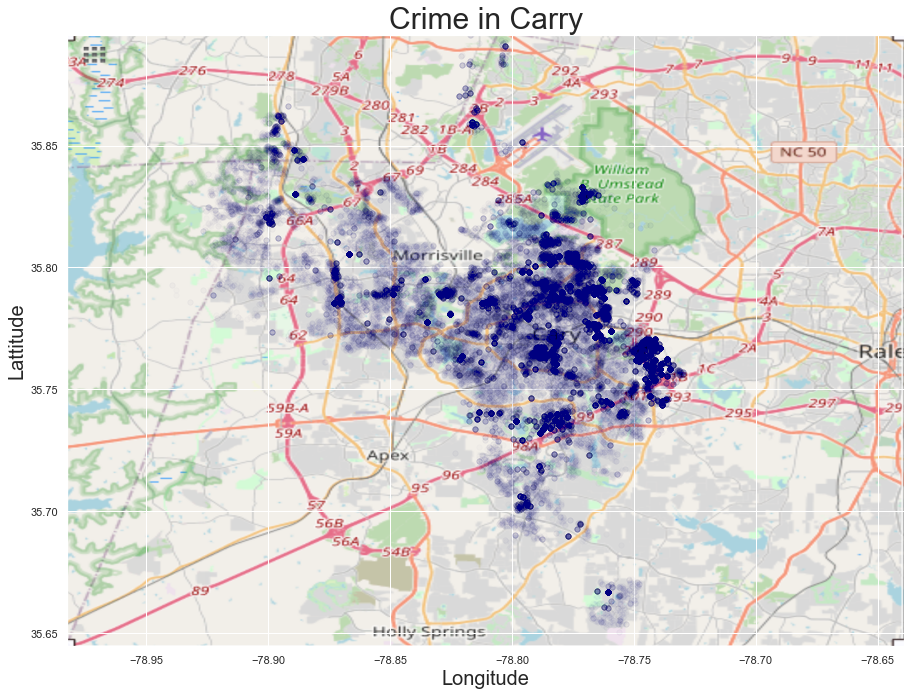

In [12]:
# Analyze by cluster 

fig, ax = plt.subplots(figsize = (15, 20))

ax.scatter(df['Lon'], df['Lat'], zorder=1, alpha= 0.01, c='navy', s=30)
ax.set_xlim(map_limits[0], map_limits[1])
ax.set_ylim(map_limits[2], map_limits[3])

ax.imshow(map_carry, zorder=0, extent = map_limits)
plt.title('Crime in Carry', fontsize=30)
plt.ylabel('Lattitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.show()

### Classification of Crimes

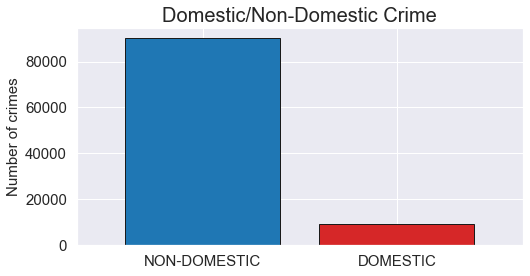

In [13]:
fig, ax = plt.subplots()
df['Domestic'].value_counts().plot(kind='bar', stacked=True, 
                                   color=['tab:blue', 'tab:red'], 
                                   fontsize=15, width=0.8, 
                                   figsize=(8, 4), edgecolor='k')

plt.title('Domestic/Non-Domestic Crime', fontsize=20)
plt.ylabel('Number of crimes', fontsize=15)
ax.set_xticklabels(('NON-DOMESTIC', 'DOMESTIC'), rotation=0)
plt.show()

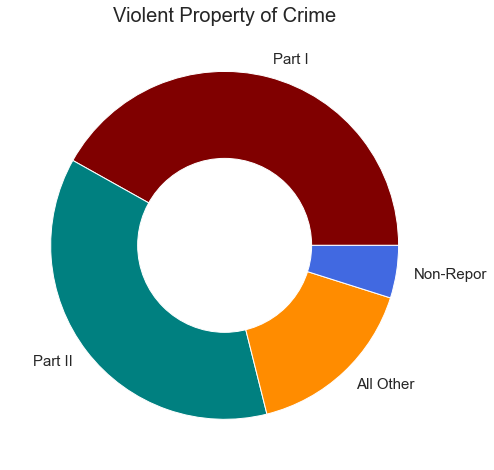

In [14]:
byvp = df['VP'].value_counts()

clrnames = ['maroon', 'teal', 'darkorange', 'royalblue']
byvp.plot(kind='pie', figsize=(8, 8), ylabel='', 
           fontsize=15, colors=clrnames, shadow=False, 
          labeldistance=1.1, legend=False)

my_circle = plt.Circle((0,0), 0.5, color='white')
plt.gcf().gca().add_artist(my_circle)

plt.title('Violent Property of Crime', fontsize=20)
plt.show()

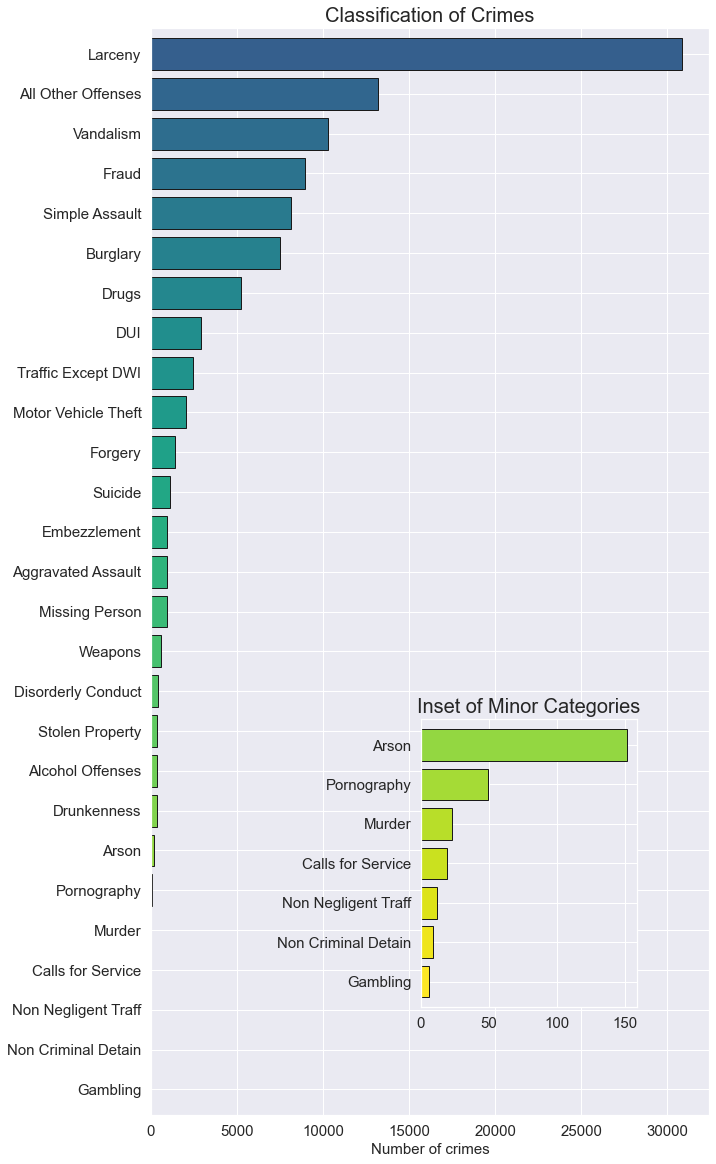

In [15]:
bycat = df['Cat'].value_counts().sort_values()
color = mpl.cm.viridis_r(np.linspace(0, 0.7, len(bycat)))

fig, ax1 = plt.subplots()
bycat.plot(kind='barh', color=color, fontsize=15, 
           figsize=(10, 20), width=0.8, edgecolor='k', ax=ax1)

plt.title('Classification of Crimes', fontsize=20)
plt.xlabel('Number of crimes', fontsize=15)

ax2 = fig.add_axes([0.5, 0.2, 0.3, 0.2])
bycat[:7].plot(kind='barh', color=color, fontsize=15, 
            width=0.8, edgecolor='k', ax=ax2)

plt.title('Inset of Minor Categories', fontsize=20)
plt.show()

# Time Series Analysis 

In [216]:
ts = df[['Tot_Inc']]
ts.head()

,Tot_Inc
Date,
2004-02-14,1
2005-05-17,1
2007-01-12,1
2010-01-01,1
2001-10-16,1


In [17]:
def by_select(by='Year', last=0, dif=False):    
    data = ts.resample(by[0]).sum()[-last:]
    data = [data.diff()[1:] if dif else data][0]
    pre = ['Difference of ' if dif else ''][0]
    return data, pre

In [18]:
def ts_plot(by='Year', last=0, lwd=1.5, dif=False):

    data, pre = by_select(by, last, dif)
    
    data.plot(kind='line', figsize=(12, 3), color='k', 
              legend=False, fontsize=15, linewidth=lwd)
        
    plt.title(pre + 'Number of Crimes Aggrigated by {}'.format(by), 
              fontsize=20)
    plt.ylabel(pre + 'Number of Crimes', fontsize=15)
    plt.xlabel('Time Period', fontsize=15)
    plt.show()

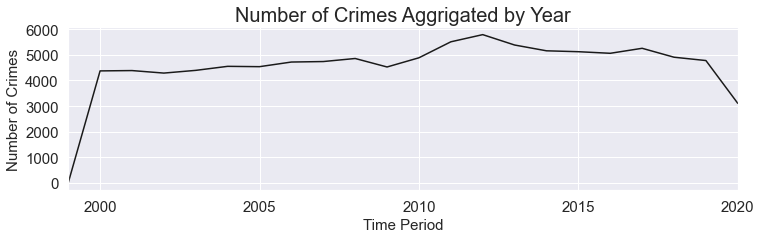

In [19]:
ts_plot()

### Periodicity of the Crime: Aggrigate 

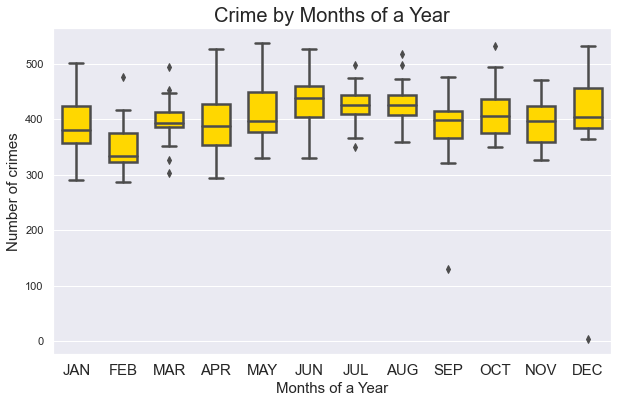

In [20]:
bymonth = ts.resample('M').sum()
bymonth['MOY'] = bymonth.index.month
moy = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',\
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

fig, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x = 'MOY', y = 'Tot_Inc', data = bymonth, 
                  width=0.6, linewidth=2.5, color='gold', 
                  saturation=1)

plt.title('Crime by Months of a Year', fontsize=20)
plt.ylabel('Number of crimes', fontsize=15)
plt.xlabel('Months of a Year', fontsize=15)
ax.set_xticklabels(moy, rotation=0, fontsize=15)
plt.show()

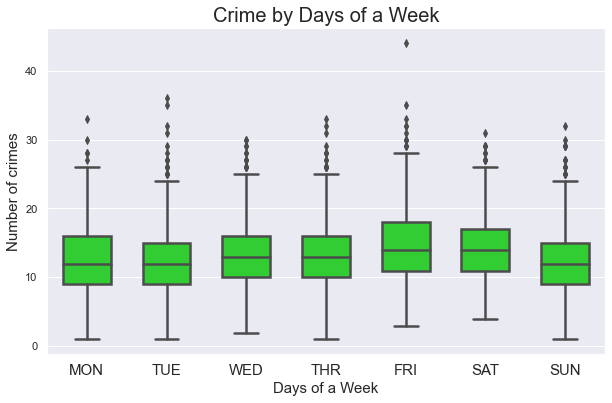

In [21]:
byday = ts.resample('D').sum()
byday['DOW'] = byday.index.dayofweek
dow = ['MON', 'TUE', 'WED', 'THR', 'FRI', 'SAT', 'SUN']

fig, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x = 'DOW', y = 'Tot_Inc', data = byday, 
                  width=0.6, linewidth=2.5, color='limegreen', 
                  saturation=1)

plt.title('Crime by Days of a Week', fontsize=20)
plt.ylabel('Number of crimes', fontsize=15)
plt.xlabel('Days of a Week', fontsize=15)
ax.set_xticklabels(dow, rotation=0, fontsize=15)
plt.show()

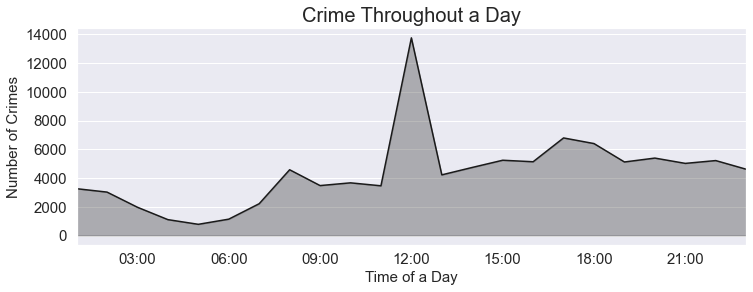

In [22]:
bytime = df[['Time', 'Tot_Inc']].set_index('Time')
bytime.index = pd.to_datetime(bytime.index)
bytime = bytime.resample('60min').sum()

bytime.plot(kind='line', legend=False, figsize=(12, 4), 
            color='k', fontsize=15)
plt.fill_between(bytime.index, bytime['Tot_Inc'], alpha=0.3, color='k')

plt.title('Crime Throughout a Day', fontsize=20)
plt.ylabel('Number of Crimes', fontsize=15)
plt.xlabel('Time of a Day', fontsize=15)
plt.show()

### Periodicity of the Crime: Time Series 

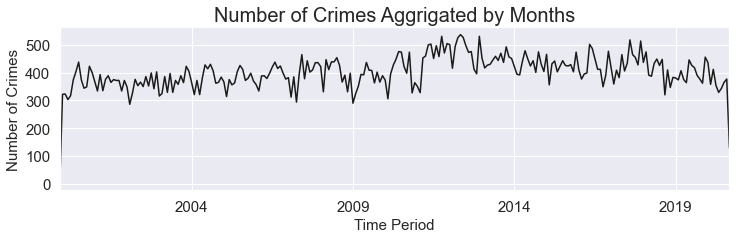

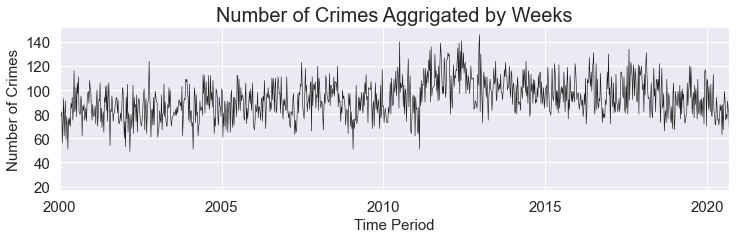

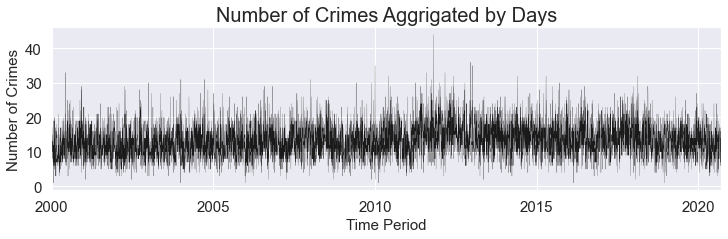

In [23]:
ts_plot('Months')
ts_plot('Weeks', lwd=0.6)
ts_plot('Days', lwd=0.2)

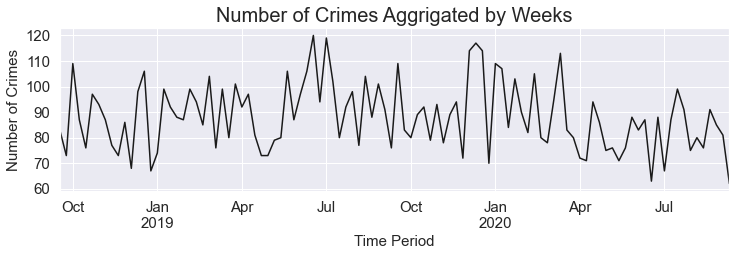

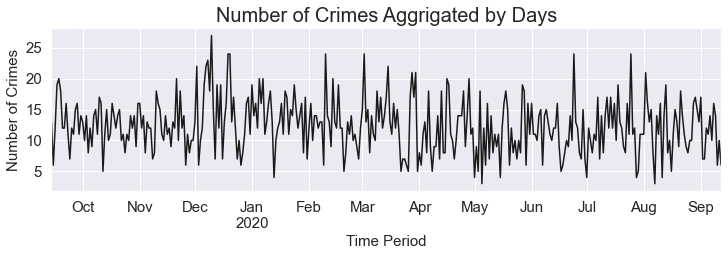

In [24]:
ts_plot('Weeks', last=104)
ts_plot('Days', last=365)

# Time Series Model 

In [176]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

### Removing Trend: I of AR-I-MA

In [50]:
def ts_jointplot(by='Year', last=0, dif=False):
    
    data, pre = by_select(by, last, dif)
    
    grid = sns.jointplot(x=data.index, y=data['Tot_Inc'], 
                         ec='k', fc='none', s=50, linewidth=0.9,
                         marginal_kws={'bins':20, 'kde':True, 
                                       'color':'steelblue', 
                                       'alpha':1})
    
    grid.set_axis_labels('Date', pre + 'Number of Crimes per ' + by, 
                         fontsize=15)
    plt.show()

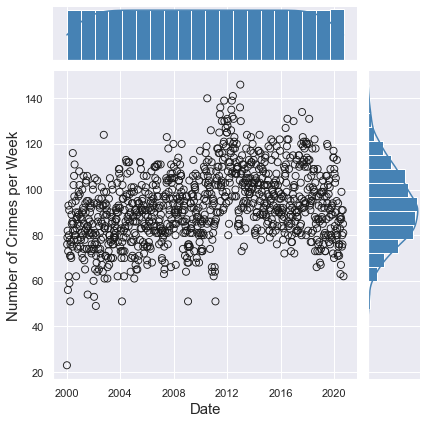

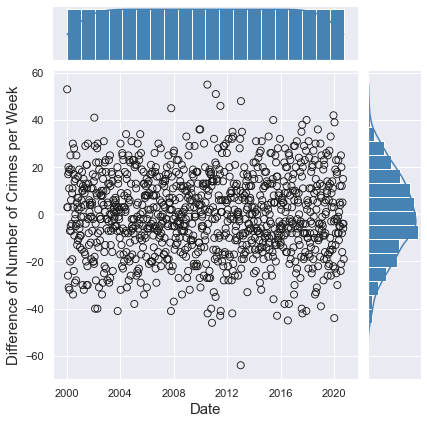

In [51]:
ts_jointplot(by='Week')
ts_jointplot(by='Week', dif=True)

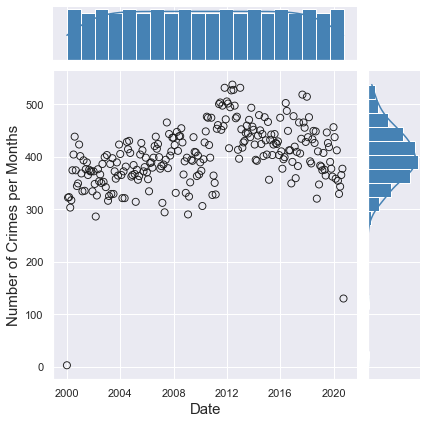

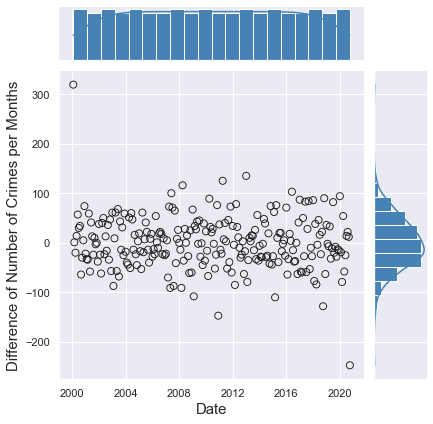

In [52]:
ts_jointplot(by='Months')
ts_jointplot(by='Months', dif=True)

### Order of AR & MA 

In [29]:
def plot_acf_pacf(by='Year', last=0, dif=False):
    
#     data = ts.resample(by[0]).sum()[-last:]
#     data = [data.diff()[1:] if dif else data][0]
#     pre = ['Difference of ' if dif else ''][0]
    
    data, pre = by_select(by, last, dif)
    
    with mpl.rc_context():
        mpl.rc('figure', figsize=(12, 3))
        plot_acf(data, use_vlines=True, color='k')

        plt.title('Autocorrelation of ' + pre + \
                  'of Number of Crimes', fontsize=20)
        plt.ylabel('ACF', fontsize=15)
        plt.xlabel('Number of Lag', fontsize=15)

        plot_pacf(data, use_vlines=True, color='k')
        plt.title('Partial Autocorrelation of ' + pre + \
                  'Difference of Number of Crimes', fontsize=20)
        plt.ylabel('PACF', fontsize=15)
        plt.xlabel('Number of Lag', fontsize=15)
    plt.show()

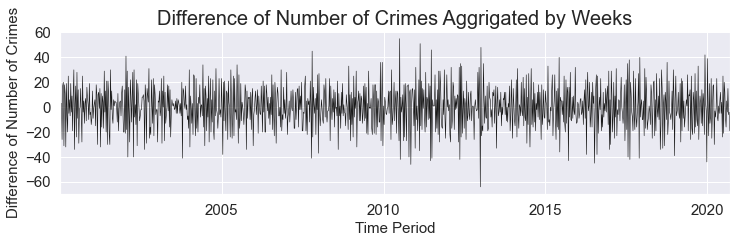

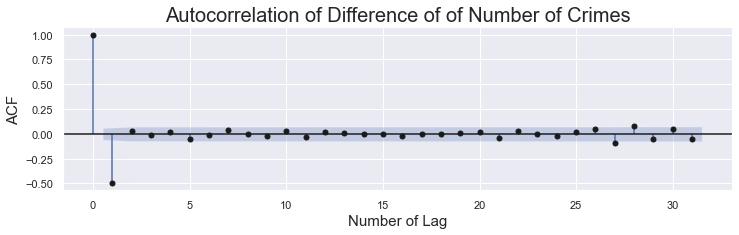

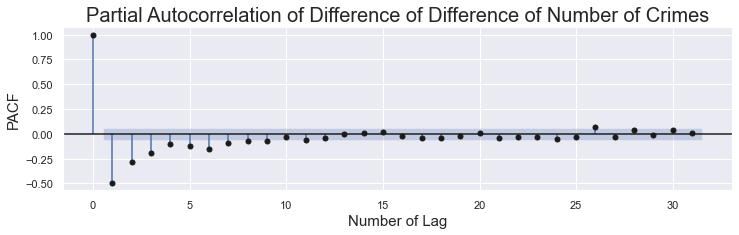

In [30]:
ts_plot(by='Weeks', dif=True, lwd=0.6)
plot_acf_pacf(by='Week', dif=True)

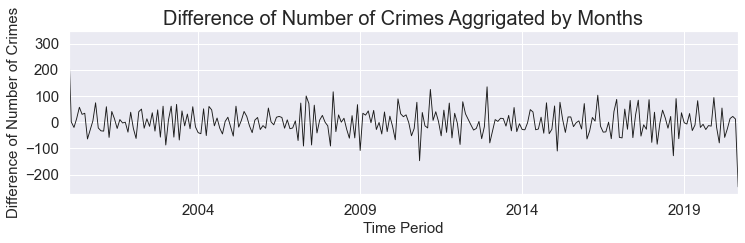

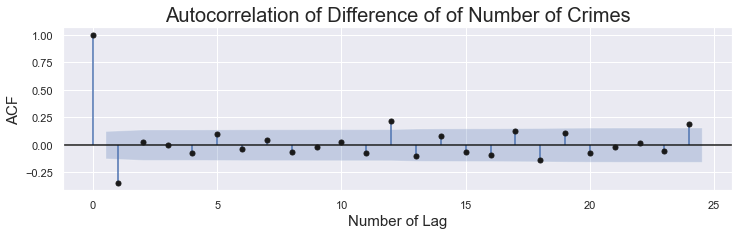

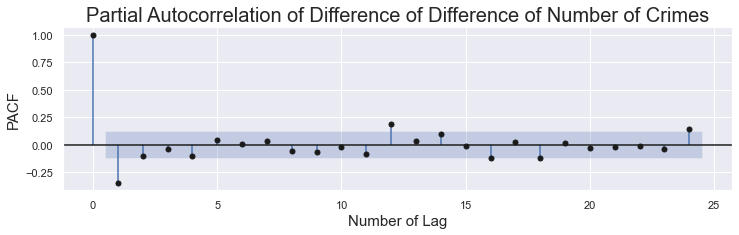

In [53]:
# There is annual periodicity in both ACF and PACF 
# Fit SARIMA 
# Use periodicity of 52 for weekly data as well. 

ts_plot(by='Months', dif=True, lwd=0.9)
plot_acf_pacf(by='Months', dif=True)

### Hyperparameter Tuning: Fit SARIMA model with annual periodicity

In [32]:
ts_w = ts.resample('W').sum()
ts_m = ts.resample('M').sum()
ts_w.head()

,Tot_Inc
Date,
2000-01-02,23
2000-01-09,76
2000-01-16,79
2000-01-23,82
2000-01-30,56


In [33]:
auto_arma = arma_order_select_ic(ts_w)
print('BIC: \n', auto_arma['bic'], 
      '\n\nBIC min order: \t', auto_arma['bic_min_order'])

BIC: 
              0            1            2
0  9048.384854  8943.131273  8882.523185
1  8877.698419  8720.994917  8727.544401
2  8797.446993  8727.464378  8725.507976
3  8772.135499  8729.971506  8732.187504
4  8763.180806  8734.413059  8738.087805 

BIC min order: 	 (1, 1)


In [34]:
auto_arima = arma_order_select_ic(ts_w.diff()[1:])
print('BIC: \n', auto_arima['bic'], 
      '\n\nBIC min order: \t', auto_arima['bic_min_order'])

BIC: 
              0            1            2
0  9245.043221  8719.352784  8724.096867
1  8946.573936  8723.565136  8713.088890
2  8858.143806  8721.241097  8719.838989
3  8820.473664  8723.217144  8725.616036
4  8815.250847  8727.578533  8734.181572 

BIC min order: 	 (1, 2)


In [35]:
model = ARIMA(ts_w, order=(1, 1, 2))
week_model = model.fit()
week_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Tot_Inc   No. Observations:                 1080
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4339.083
Method:                       css-mle   S.D. of innovations             13.435
Date:                Tue, 06 Oct 2020   AIC                           8688.165
Time:                        15:01:20   BIC                           8713.089
Sample:                    01-09-2000   HQIC                          8697.603
                         - 09-13-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0077      0.020      0.386      0.700      -0.031       0.047
ar.L1.D.Tot_Inc     0.8746      0.051     17.256      0.000       0.775       0.974
ma.L1.D.Tot_Inc    -1.6926      0.066    -25.603      0.000      -1.822      -1.563
ma.L2.D.Tot_Inc     0.6985      0.063     11.072      0.000       0.575       0.822
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1434           +0.0000j            1.1434            0.0000
MA.1            1.0209           +0.0000j            1.0209            0.0000
MA.2            1.4023           +0.0000j            1.4023            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
auto_arma = arma_order_select_ic(ts_m)
print('BIC: \n', auto_arma['bic'], 
      '\n\nBIC min order: \t', auto_arma['bic_min_order'])

BIC: 
              0            1            2
0  2764.497576  2722.191028  2702.778864
1  2685.785520  2667.661125  2673.182416
2  2671.852442  2673.182262  2676.013639
3  2674.394927  2675.238973  2684.095714
4  2679.792768  2680.489550  2684.947897 

BIC min order: 	 (1, 1)


In [37]:
auto_arima = arma_order_select_ic(ts_m.diff()[1:])
print('BIC: \n', auto_arima['bic'], 
      '\n\nBIC min order: \t', auto_arima['bic_min_order'])

BIC: 
              0            1            2
0  2704.545044  2654.979849  2659.927892
1  2668.248349  2659.246931  2661.077612
2  2666.350602  2660.332742  2665.664946
3  2670.577812  2665.554968  2670.006843
4  2670.832650  2670.512592  2675.228271 

BIC min order: 	 (0, 1)


In [38]:
model = ARIMA(ts_m, order=(0, 1, 1))
months_model = model.fit()
months_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Tot_Inc   No. Observations:                  249
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1319.214
Method:                       css-mle   S.D. of innovations             48.335
Date:                Tue, 06 Oct 2020   AIC                           2644.427
Time:                        15:01:26   BIC                           2654.980
Sample:                    01-31-2000   HQIC                          2648.675
                         - 09-30-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2919      1.186      0.246      0.806      -2.032       2.616
ma.L1.D.Tot_Inc    -0.6156      0.076     -8.102      0.000      -0.765      -0.467
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.6244           +0.0000j            1.6244            0.0000
-----------------------------------------------------------------------------
"""

### Model Perfermance 

In [68]:
def pred_plot(by='Year', order=(1, 0, 1), last=0, 
              start=0, dif=False, end=-1, alpha=1):
    
    data, pre = by_select(by, last, dif)
    
    model = ARIMA(data, order=order)
    model_name = model.fit()
    
    pred = model_name.predict(typ='levels', end=end)

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(data[start:], color='olive', linewidth=0.5, alpha=alpha)
    ax.plot(pred[start:], color='k', linewidth=1.5, alpha=1)

    obs = mpl.patches.Patch(color='olive', label='Observed')
    pds = mpl.patches.Patch(color='k', label='Predicted')
    plt.legend(handles=[obs, pds], loc=8)

    plt.title('Prediction by ARIMA{} for {}ly Data'.format(str(order), by), 
              fontsize=20)
    plt.ylabel('Number of Crimes', fontsize=15)
    plt.xlabel('Year', fontsize=15)
    plt.show()

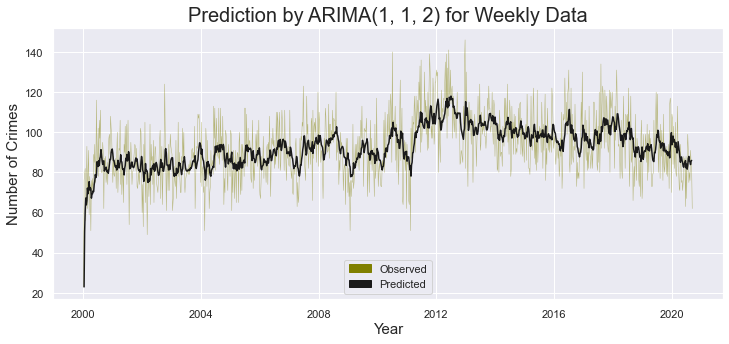

In [69]:
pred_plot(by='Week', order=(1, 1, 2), alpha=0.5)

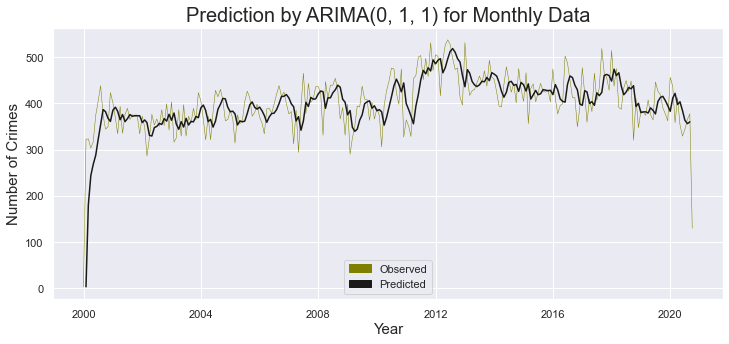

In [70]:
pred_plot(by='Month', order=(0, 1, 1))

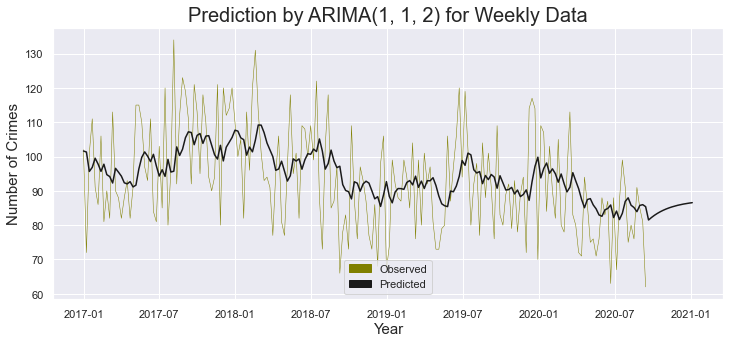

In [71]:
pred_plot(by='Week', order=(1, 1, 2), start='2017-01-01', end='2021-01-01')

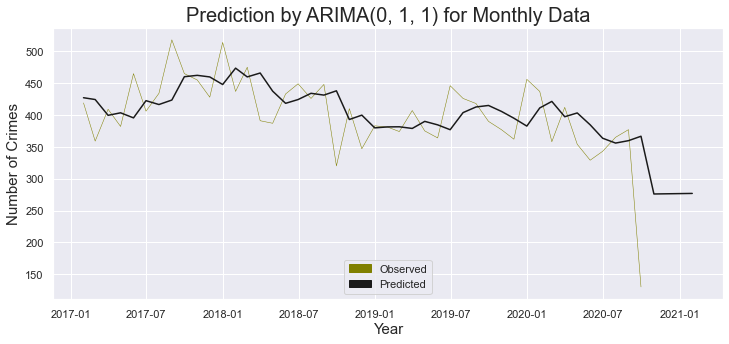

In [72]:
pred_plot(by='Month', order=(0, 1, 1), start='2017-01-01', end='2021-01-01')

# Do Crime Depend on Stock Market? Weather?

Interesting for the furthter investigation 

### Forecasting 

### Model Evaluation 

In [ ]:
# Evaluate model 

# Specific forecasting method 

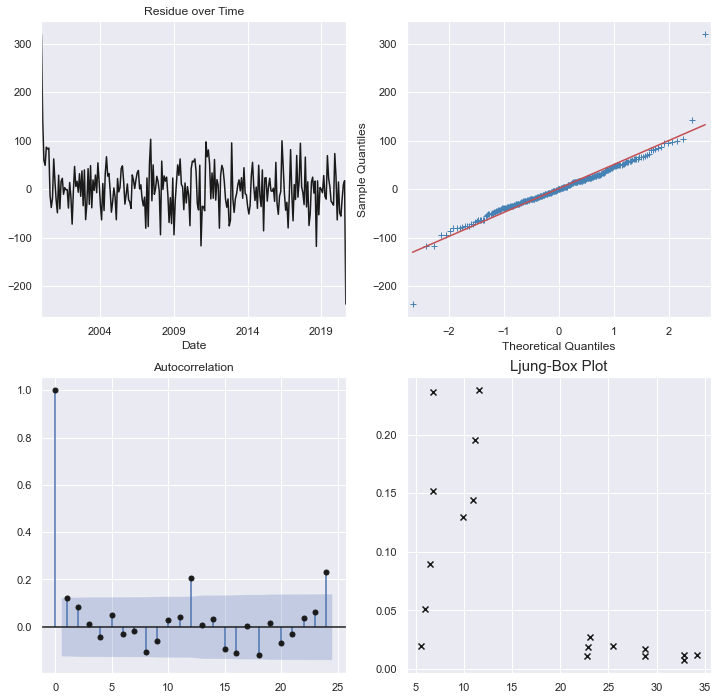

In [174]:
# Fig size of statsmodel plot is from here

resids = months_model.resid
ljung = acorr_ljungbox(resids, lags=20, return_df=False, model_df=2)

fig, ax = plt.subplots(2, 2, figsize=(12,12))

resids.plot(color='k', ax=ax[0, 0], title='Residue over Time')

sm.graphics.qqplot(resids, line ='s', color='steelblue', 
                   marker='+', ax=ax[0, 1])

plot_acf(resids, color='k', ax=ax[1, 0])

plt.scatter(ljung[0], ljung[1], marker='x', color='k')
plt.title('Ljung-Box Plot', fontsize=15)
plt.show()

### SARIMAX model 

- There seems to be no auto sarima
- There are 7 parameters p, d, q, P, D, Q, s. They can be anything. May be write a for loop to find the optimal value. 

In [213]:
import warnings
warnings.filterwarnings("ignore")

min_bic = 100000
pm, dm, qm, Pm, Dm, Qm = [0, 0, 0, 0, 0, 0]
for p in range(2):
    for d in range(2):
        for q in range(2):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):
                        model = SARIMAX(ts_m, 
                                        order=(p, d, q), 
                                        seasonal_order=(P, D, Q, 12))
                        result = model.fit()
                        bic_i = result.bic
                        if bic_i < min_bic:
                            min_bic = bic_i
                            pm, dm, qm, Pm, Dm, Qm = [p, d, q, P, D, Q]
                        print('{}\t{}\t{}\t{}\t{}\t{}\t{}'\
                              .format(p, d, q, P, D, Q, result.bic))

0	0	0	0	0	0	3717.6812616064785
0	0	0	0	0	1	3461.076749134253
0	0	0	0	1	0	2624.4214831233307
0	0	0	0	1	1	2587.2420420315984
0	0	0	1	0	0	2803.970638790703
0	0	0	1	0	1	2768.7119400389934
0	0	0	1	1	0	2592.035389119632
0	0	0	1	1	1	2592.4363639917347
0	0	1	0	0	0	3429.535163535449
0	0	1	0	0	1	3231.452996587162
0	0	1	0	1	0	2609.1128914508326
0	0	1	0	1	1	2562.2035017570233
0	0	1	1	0	0	3090.5259582269036
0	0	1	1	0	1	2740.7488621040948
0	0	1	1	1	0	2574.2078889097475
0	0	1	1	1	1	2567.503490655174
0	1	0	0	0	0	2699.049771133025
0	1	0	0	0	1	2693.1418610402293
0	1	0	0	1	0	2641.264359809102
0	1	0	0	1	1	2554.270351335029
0	1	0	1	0	0	2689.0675019526225
0	1	0	1	0	1	2672.474827069331
0	1	0	1	1	0	2600.4255818889756
0	1	0	1	1	1	2559.6580745994706
0	1	1	0	0	0	2649.5633722442044
0	1	1	0	0	1	2643.8492884516068
0	1	1	0	1	0	2581.392786832346
0	1	1	0	1	1	2508.3380139403293
0	1	1	1	0	0	2637.672110702576
0	1	1	1	0	1	2622.8532293827216
0	1	1	1	1	0	2535.023924724171
0	1	1	1	1	1	2513.519148114079
1	0	0	0	0	0	2717.22751

In [214]:
print(' Minimum BIC:\t\t', min_bic, 
      '\n Order of minimum BIC:\t', [pm, dm, qm, Pm, Dm, Qm])

 Minimum BIC:		 2508.3380139403293 
 Order of minimum BIC:	 [0, 1, 1, 0, 1, 1]


In [205]:
model = SARIMAX(ts_m, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
months_model = model.fit()
months_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Tot_Inc   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1245.967
Date:                            Tue, 06 Oct 2020   AIC                           2497.934
Time:                                    19:49:36   BIC                           2508.338
Sample:                                12-31-1999   HQIC                          2502.127
                                     - 09-30-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6264      0.047    -13.410      0.000      -0.718      -0.535
ma.S.L12      -0.8049      0.056    -14.401      0.000      -0.914      -0.695
sigma2      2042.9136    119.770     17.057      0.000    1808.168    2277.659
===================================================================================
Ljung-Box (Q):                       20.05   Jarque-Bera (JB):               153.40
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.96
Prob(H) (two-sided):                  0.29   Kurtosis:                         6.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [210]:
def pred_plot(by='Year', last=0, 
              start=0, dif=False, end=-1, alpha=1):
    
    data, pre = by_select(by, last, dif)
    
    model = SARIMAX(ts_m, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
    model_name = model.fit()
    
    pred = model_name.predict(typ='levels', end=end)

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(data[start:], color='olive', linewidth=0.5, alpha=alpha)
    ax.plot(pred[start:], color='k', linewidth=1.5, alpha=1)

    obs = mpl.patches.Patch(color='olive', label='Observed')
    pds = mpl.patches.Patch(color='k', label='Predicted')
    plt.legend(handles=[obs, pds], loc=8)

#     plt.title('Prediction by ARIMA{} for {}ly Data'.format(str(order), by), 
#               fontsize=20)
    plt.ylabel('Number of Crimes', fontsize=15)
    plt.xlabel('Year', fontsize=15)
    plt.show()

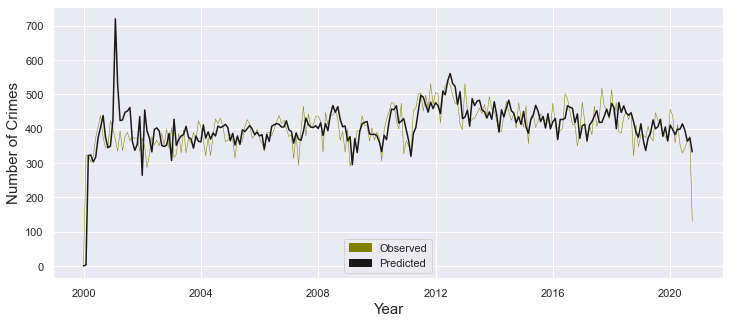

In [211]:
pred_plot(by='Month')

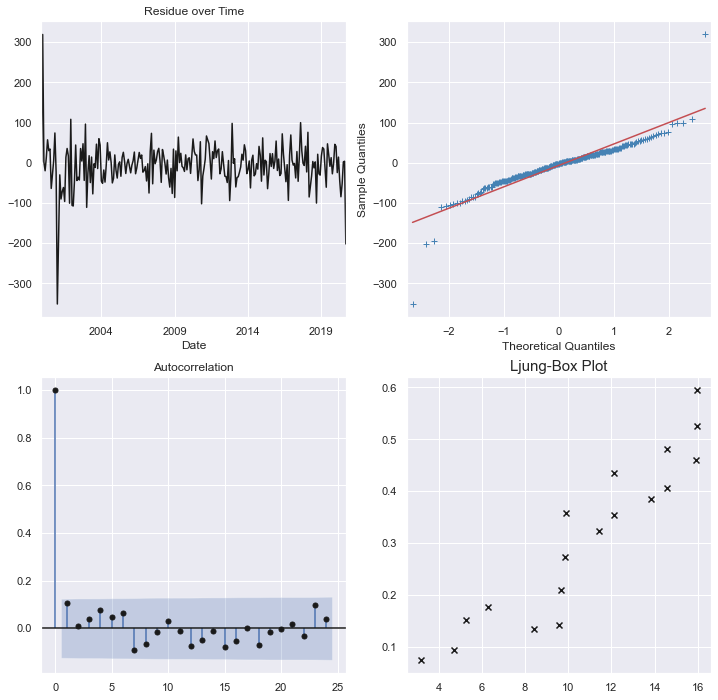

In [212]:
# Fig size of statsmodel plot is from here

resids = months_model.resid
ljung = acorr_ljungbox(resids, lags=20, return_df=False, model_df=2)

fig, ax = plt.subplots(2, 2, figsize=(12,12))

resids.plot(color='k', ax=ax[0, 0], title='Residue over Time')

sm.graphics.qqplot(resids, line ='s', color='steelblue', 
                   marker='+', ax=ax[0, 1])

plot_acf(resids, color='k', ax=ax[1, 0])

plt.scatter(ljung[0], ljung[1], marker='x', color='k')
plt.title('Ljung-Box Plot', fontsize=15)
plt.show()